2020.01.13

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.DataFrame(np.random.randn(5,3),
                 columns=['c1','c2','c3'])
df

,c1,c2,c3
0,1.644949,-0.167028,-0.160568
1,-0.927519,0.181201,-0.362740
2,1.628185,-0.710031,-0.521265
3,-0.910087,-1.451984,-0.229769
4,-0.223497,-0.253275,-0.115628


In [3]:
df.iloc[0,0] = None
df

,c1,c2,c3
0,NaN,-0.167028,-0.160568
1,-0.927519,0.181201,-0.362740
2,1.628185,-0.710031,-0.521265
3,-0.910087,-1.451984,-0.229769
4,-0.223497,-0.253275,-0.115628


In [4]:
df.ix[1,['c1','c3']] = np.nan
df.ix[2,['c2']] = np.nan
df.ix[3,['c2']] = np.nan
df.ix[4,['c3']] = np.nan
df

,c1,c2,c3
0,NaN,-0.167028,-0.160568
1,NaN,0.181201,NaN
2,1.628185,NaN,-0.521265
3,-0.910087,NaN,-0.229769
4,-0.223497,-0.253275,NaN


### NaN 대체
- fillna : na만 다른 값으로 대체
- replace : na뿐만 아니라 다른 모든 값에 대해서 대체 가능

### fillna()

In [5]:
# fillna()
# null에 0넣기
df.fillna(0)

,c1,c2,c3
0,0.000000,-0.167028,-0.160568
1,0.000000,0.181201,0.000000
2,1.628185,0.000000,-0.521265
3,-0.910087,0.000000,-0.229769
4,-0.223497,-0.253275,0.000000


In [6]:
# ffill : 위에 값 가져오기
df.fillna(method ='ffill')

,c1,c2,c3
0,NaN,-0.167028,-0.160568
1,NaN,0.181201,-0.160568
2,1.628185,0.181201,-0.521265
3,-0.910087,0.181201,-0.229769
4,-0.223497,-0.253275,-0.229769


In [7]:
# bfill : 아래 값 가져오기
df.fillna(method='bfill')

,c1,c2,c3
0,1.628185,-0.167028,-0.160568
1,1.628185,0.181201,-0.521265
2,1.628185,-0.253275,-0.521265
3,-0.910087,-0.253275,-0.229769
4,-0.223497,-0.253275,NaN


In [8]:
# 평균으로 대체
df.fillna(df.mean()) # 전체 평균이 NaN값에 들어간다

,c1,c2,c3
0,0.164867,-0.167028,-0.160568
1,0.164867,0.181201,-0.303867
2,1.628185,-0.079701,-0.521265
3,-0.910087,-0.079701,-0.229769
4,-0.223497,-0.253275,-0.303867


In [30]:
print(df)
df.fillna(df.mean()['c1':'c2']) # 각 열의 평균이 NaN값에 들어간다

         c1        c2        c3
0       NaN -0.167028 -0.160568
1       NaN  0.181201       NaN
2  1.628185       NaN -0.521265
3 -0.910087       NaN -0.229769
4 -0.223497 -0.253275       NaN


,c1,c2,c3
0,0.164867,-0.167028,-0.160568
1,0.164867,0.181201,NaN
2,1.628185,-0.079701,-0.521265
3,-0.910087,-0.079701,-0.229769
4,-0.223497,-0.253275,NaN


### replace

In [53]:
s = pd.Series([1,2,3,4,np.nan])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [54]:
s.replace(3,9) # s에 있는 모든 3을 9로 

0    1.0
1    2.0
2    9.0
3    4.0
4    NaN
dtype: float64

In [55]:
s.replace(np.nan, 5) # s에 있는 모든 NaN을 5로 

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [56]:
s.replace([1,2,3],[6,7,8]) # 1,2,3을 6,7,8로

0    6.0
1    7.0
2    8.0
3    4.0
4    NaN
dtype: float64

In [57]:
s.replace([1,2,3,np.nan],[10,20,30,99]) # 1,2,3,NaN를 10,20,30,99로

0    10.0
1    20.0
2    30.0
3     4.0
4    99.0
dtype: float64

In [58]:
s.replace({1:5,3:30, np.nan:99}) # 1은 5로, 3은 30으로, NaN은 99로

0     5.0
1     2.0
2    30.0
3     4.0
4    99.0
dtype: float64

In [59]:
# 데이터 프레임에서 replace
df = pd.DataFrame({'c1':['aaa','b','c','d'],
                  'c2' : [1,2,3,4],
                  'c3':[5,6,7,np.nan]})

df.replace({'c1':'aaa'},{'c1':'bbb'}) # c1에 있는 모든 aaa가 bbb로
df.replace()

,c1,c2,c3
0,bbb,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [60]:
df.replace({'c3':np.nan},{'c3':99}) # c3에 있는 모든 NaN가 99로

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,99.0


### where()
- pandas
    - pd.where(조건,참이 아닐때 들어갈 값)
- numpy
    - np.where(조건, 참일때 들어갈 값, 아닐때 들어갈 값)

In [120]:
df = pd.DataFrame(np.random.randn(5,3),
                 columns=['c1','c2','c3'])
df.iloc[0,0] = None
df.ix[1,['c1','c3']] = np.nan
df.ix[2,['c2']] = np.nan
df.ix[3,['c2']] = np.nan
df.ix[4,['c3']] = np.nan
df

,c1,c2,c3
0,NaN,-0.160959,-0.681619
1,NaN,-0.429161,NaN
2,0.015008,NaN,0.329720
3,-0.628596,NaN,0.134152
4,-0.361279,-1.158286,NaN


In [122]:
df.where(pd.notnull(df),df.mean(),axis = 'columns') # 각 열의 평균값이 NaN에 들어간다

,c1,c2,c3
0,-0.324956,-0.160959,-0.681619
1,-0.324956,-0.429161,-0.072582
2,0.015008,-0.582802,0.329720
3,-0.628596,-0.582802,0.134152
4,-0.361279,-1.158286,-0.072582


In [16]:
df.where(pd.notnull(df),df.mean(axis=1),axis = 'index') # 각 행의 평균값이 NaN에 들어간다

,c1,c2,c3
0,-0.163798,-0.167028,-0.160568
1,0.181201,0.181201,0.181201
2,1.628185,0.553460,-0.521265
3,-0.910087,-0.569928,-0.229769
4,-0.223497,-0.253275,-0.238386


```
np.argmax() : 최대값의 index
np.argmin() : 최소값의 index
```

In [21]:
arr = np.array([1,2,3,10,20,30,0.1,0.2])
print(np.min(arr)) # min(arr)
print(np.argmin(arr)) # 최소값의 index

0.1
6


In [22]:
print(np.max(arr))
print(np.argmax(arr)) # 최대값의 index

30.0
5


In [29]:
print(arr<1)
np.where(arr<1) # where 함수는 조건문 사용 -> 출력값 : 인덱스

[False False False False False False  True  True]


(array([6, 7], dtype=int64),)

In [27]:
np.where(arr>=10,0,arr) # 조건을 만족하는 것은 0 아닌것은 arr(그대로)

array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])

In [28]:
np.where(arr>=10 ,0.1*arr,arr)

array([1. , 2. , 3. , 1. , 2. , 3. , 0.1, 0.2])

In [34]:
df2 = pd.DataFrame({'c1':[1,2,3,4,5],
                   'c2':[6,7,8,9,10]})
df2.ix[[1,3],'c2'] = np.nan
df2

,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [35]:
df2['c2p'] = np.where(pd.notnull(df2['c2'])==True,df2['c2'], df2['c1'])
df2

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [38]:
# where대신 for문으로
for i in df2.index:
    if pd.notnull(df2.ix[i,'c2']) == True:
        df2.ix[i,'cp2'] = df2.ix[i,'c2']
    else:
        df2.ix[i,'cp2'] = df2.ix[i,'c1']
df2

,c1,c2,c2p,cp2
0,1,6.0,6.0,6.0
1,2,NaN,2.0,2.0
2,3,8.0,8.0,8.0
3,4,NaN,4.0,4.0
4,5,10.0,10.0,10.0


### drop

In [123]:
df3 = pd.DataFrame({'c1':[1,2,3,4,5],
                   'c2':[6,7,8,9,10]})
df3.ix[[1,3],'c2'] = np.nan

print(df3)
print('-'*30)
print(df3.dropna(axis=0)) # 결측값이 있는 행 전체 제거
print('-'*30)
print(df3.dropna(axis=1)) # 결측값이 있는 열 전체 제거
print('-'*30)
print(df3.dropna()) # df.dropna() default는 axis = 0

   c1    c2
0   1   6.0
1   2   NaN
2   3   8.0
3   4   NaN
4   5  10.0
------------------------------
   c1    c2
0   1   6.0
2   3   8.0
4   5  10.0
------------------------------
   c1
0   1
1   2
2   3
3   4
4   5
------------------------------
   c1    c2
0   1   6.0
2   3   8.0
4   5  10.0


### interpolate : 결측값 보간
1) 시계열 데이터에 대해 선형적으로 비례하는 값

2)이미지 보관 : 그라데이션

In [45]:
from datetime import datetime
dateStr=['1/13/2020','1/16/2020','1/17/2020','1/20/2020']

dates = pd.to_datetime(dateStr)
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [46]:
ts = pd.Series([1,np.nan,np.nan,10], index = dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [47]:
tslr = ts.interpolate() # method = linear : default값
tslr

2020-01-13     1.0
2020-01-16     4.0
2020-01-17     7.0
2020-01-20    10.0
dtype: float64

In [49]:
ts.interpolate(method = 'values') # method = value : 선형적으로 비례하게 결측값 보간

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17     6.142857
2020-01-20    10.000000
dtype: float64

In [51]:
ts.interpolate(method = 'time')

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17     6.142857
2020-01-20    10.000000
dtype: float64

In [130]:
ts.interpolate(method = 'time',limit = 1) # limit 결측값 몇개 보간할것인지 제한 할 수 있음

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

### duplicate
 - duplicated() : 병합 여부
 - drop_duplicates() : 한개만 남겨놓고 나머지는 제거

In [65]:
df = pd.DataFrame({'k1':['a','b','b','c','c'],
                   'k2':['x','y','y','x','z'],
                   'col':[10,20,30,40,50]})
df

,k1,k2,col
0,a,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [66]:
# k1의 중복여부
df.k1.duplicated() # df.duplicated('k1'), df.duplicated('[k1'])

0    False
1    False
2     True
3    False
4     True
Name: k1, dtype: bool

In [67]:
# k1, k2 둘 다 중복인 경우
df.duplicated(['k1','k2'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [68]:
# keep
df.duplicated('k1',keep='first') # 중복되는 값 중 첫번째 값 빼고 나머지는 중복으로 표시
df.duplicated('k1',keep='last') # 중복되는 값 중 마지만 빼고 다 중복으로 표시
df.duplicated('k1',keep=False) # 중복되는 것은 모두 표시

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [69]:
# 중복값 제거(한개만 살리고 나머지 중복은 제거)
df.drop_duplicates('k1',keep='first') # 중복 중 첫번째로 나온 것 빼고 제거

,k1,k2,col
0,a,x,10
1,b,y,20
3,c,x,40


In [70]:
df.drop_duplicates('k1',keep='last') # 중복 중 마지막에 나온 것 빼고 제거

,k1,k2,col
0,a,x,10
2,b,y,30
4,c,z,50


In [71]:
df.drop_duplicates('k1',keep=False) # 중복 다 제거

,k1,k2,col
0,a,x,10


### 유일한 값
- unique() : 유일한 값(값의 종류)
- value_counts() : 유일한 값 개수 세기

In [72]:
df = pd.DataFrame({
    'a':['a1','a1','a2','a2','a3'],
    'b':['a1','a1','a2','a2',np.nan],
    'c':[1,1,3,4,4]})
df

,a,b,c
0,a1,a1,1
1,a1,a1,1
2,a2,a2,3
3,a2,a2,4
4,a3,NaN,4


In [73]:
df['a'].unique() # 중복 제거한 값 => a1, a2, a3

array(['a1', 'a2', 'a3'], dtype=object)

In [74]:
# normalize : defalut = False
df['a'].value_counts() # 각 값의 개수, normalize = False : default

a1    2
a2    2
a3    1
Name: a, dtype: int64

In [75]:
df['a'].value_counts(normalize=True) # normalize =True : 상대비율

a1    0.4
a2    0.4
a3    0.2
Name: a, dtype: float64

In [76]:
# sort 개수 기준 정렬 default = True
df['c'].value_counts(normalize=True,sort=False)

1    0.4
3    0.2
4    0.4
Name: c, dtype: float64

In [77]:
df['c'].value_counts(normalize=True,sort=True)

4    0.4
1    0.4
3    0.2
Name: c, dtype: float64

In [78]:
# ascending : 오름차순 default = False
df['c'].value_counts(normalize=True,sort=True,ascending=True)

3    0.2
1    0.4
4    0.4
Name: c, dtype: float64

In [79]:
df['c'].value_counts(sort=True,ascending=False) # 내림차순

4    2
1    2
3    1
Name: c, dtype: int64

In [80]:
df['c'].value_counts(sort=True,ascending=True)

3    1
1    2
4    2
Name: c, dtype: int64

In [81]:
df['c'].value_counts(sort=False) # 정렬 기준 없음

1    2
3    1
4    2
Name: c, dtype: int64

In [84]:
# dropna : default = True
df['b'].value_counts()

a1    2
a2    2
Name: b, dtype: int64

In [85]:
df['b'].value_counts(dropna = False) # dropna=False면 NaN까지 세어준다

a1     2
a2     2
NaN    1
Name: b, dtype: int64

In [87]:
# group별 데이터 개수 세기
print(df['c'])
df['c'].value_counts(bins=[0,1,2,3,4,5],sort=False) # (): 개구간(초과,미만), []: 폐구간(이상,이하)

0    1
1    1
2    3
3    4
4    4
Name: c, dtype: int64


(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
(4.0, 5.0]       0
Name: c, dtype: int64

In [88]:
# pd.cut()
pd.cut(df['c'], bins=[0,1,2,3,4,5]) # c에 있는 각 원소가 어디에 속하는지 알려줌
                                    # 0자리에 있는 원소는 (0,1]
                                    # 1자리에 있는 원소는 (0,1]
                                    # 2자리에 있는 원소는 (2,3]

0    (0, 1]
1    (0, 1]
2    (2, 3]
3    (3, 4]
4    (3, 4]
Name: c, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]

In [89]:
res = pd.cut(df['c'], bins=[0,1,2,3,4,5])
pd.value_counts(res) # 구간별 개수

(3, 4]    2
(0, 1]    2
(2, 3]    1
(4, 5]    0
(1, 2]    0
Name: c, dtype: int64

### 표준화
```
표준화 : (각 데이터 - 평균) / 표준편차
모집단이 정규분포를 따르는 경우, 평균: 0, 표준편차: 1
```
표준화 방법
- numpy
- scipy.stats:zscore
- sklearn.preprocessing

In [ ]:
# 변수들 간 척도가 다른 경우 데이터 표준화
# 모집단 : 전체집단
# 모집단에서 표본추출 -> 표본집단 평균, 표준편차...-> 통계량 -> 모평균, 모분산(모수, parameter) 추정

'''
모수적 방법
중심극한정리 : 무작위로 복원추출하면, 연속형 자료의 평균에 대한 분포는 정규분포를 띈다면
30개 이상의 표본의 경우 정규분포를 따른다

비모수적 방법
10개 미만의 표본의 경우 모수적 방법을 사용하지 않음
자료를 크기로 나열 -> 순위 매김 -> 차이비교

'''

### numpy

In [90]:
from numpy import *

In [91]:
data = np.random.randint(30, size = (6,5))
data

array([[ 9, 22,  6, 27, 12],
       [ 1, 28, 20,  4, 16],
       [27,  3, 16, 22, 21],
       [ 3, 29,  6,  5,  2],
       [19, 15, 24, 29,  5],
       [29,  2, 10,  3, 29]])

In [92]:
np.std(data,axis=1) # 각 행별 std

array([ 7.98498591, 10.04788535,  8.18290902, 10.09950494,  8.1877958 ,
       12.07642331])

In [93]:
np.std(data, axis=0) # 각 열별 std

array([11.04033011, 10.90489187,  6.87184271, 11.21011448,  9.19087712])

In [94]:
# 열별 표준화
std_data = (data-np.mean(data,axis=0))/np.std(data,axis=0)
std_data

array([[-0.51326968,  0.5043608 , -1.11566388,  1.07046186, -0.23574101],
       [-1.23788569,  1.05457258,  0.92163538, -0.98125671,  0.19947316],
       [ 1.11711636, -1.23797651,  0.33954988,  0.62443609,  0.74349088],
       [-1.05673169,  1.14627455, -1.11566388, -0.89205155, -1.32377645],
       [ 0.39250034, -0.13755295,  1.50372088,  1.24887217, -0.99736582],
       [ 1.29827036, -1.32967848, -0.53357838, -1.07046186,  1.61391923]])

In [95]:
np.mean(std_data, axis=0) # 각 열별 mean

array([3.70074342e-17, 0.00000000e+00, 9.25185854e-17, 0.00000000e+00,
       1.11022302e-16])

In [96]:
np.std(std_data, axis = 0) # 각 열별 std, 표준화 한 것이니깐 std =1

array([1., 1., 1., 1., 1.])

In [97]:
np.var(std_data, axis=0) # 각 열별 var, 표준화 한 것이니깐 var = 1

array([1., 1., 1., 1., 1.])

### scipy.stats:zscore

In [98]:
import scipy.stats as ss

In [99]:
# zscore()
data_ss = ss.zscore(data)
data_ss

array([[-0.51326968,  0.5043608 , -1.11566388,  1.07046186, -0.23574101],
       [-1.23788569,  1.05457258,  0.92163538, -0.98125671,  0.19947316],
       [ 1.11711636, -1.23797651,  0.33954988,  0.62443609,  0.74349088],
       [-1.05673169,  1.14627455, -1.11566388, -0.89205155, -1.32377645],
       [ 0.39250034, -0.13755295,  1.50372088,  1.24887217, -0.99736582],
       [ 1.29827036, -1.32967848, -0.53357838, -1.07046186,  1.61391923]])

### sklearn.preprocessing

In [100]:
from sklearn.preprocessing import *

In [101]:
# StandardScaler().fit_transform()
StandardScaler().fit_transform(data)

array([[-0.51326968,  0.5043608 , -1.11566388,  1.07046186, -0.23574101],
       [-1.23788569,  1.05457258,  0.92163538, -0.98125671,  0.19947316],
       [ 1.11711636, -1.23797651,  0.33954988,  0.62443609,  0.74349088],
       [-1.05673169,  1.14627455, -1.11566388, -0.89205155, -1.32377645],
       [ 0.39250034, -0.13755295,  1.50372088,  1.24887217, -0.99736582],
       [ 1.29827036, -1.32967848, -0.53357838, -1.07046186,  1.61391923]])

### Outlier : 예외처리
예외적인 값(이상치, 특이값, outlier)이 들어있는 데이터 표준화
- 1) 이상치, 특이값을 찾아서 제거
- 2) 중앙값(median), IQR을 이용하여 스케일링

표준정규분표로의 표준화 : 이상치, 특이값이 없어야한다는 가정하에 표준화( z = (x - mean)/std )

### Outlier 찾아서 제거
StandardScaler()

In [105]:
from sklearn.preprocessing import StandardScaler,RobustScaler
import matplotlib.pyplot as plt

(array([ 6.,  5.,  7., 13., 10., 15., 13., 13., 11.,  7.]),
 array([1.300971  , 2.00996726, 2.71896353, 3.4279598 , 4.13695607,
        4.84595233, 5.5549486 , 6.26394487, 6.97294114, 7.6819374 ,
        8.39093367]),
 <a list of 10 Patch objects>)

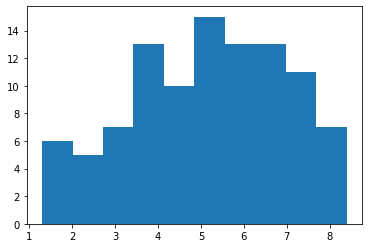

In [106]:
mu, sigma = 5, 2
x = mu + sigma*np.random.randn(100)
plt.hist(x)

In [107]:
np.mean(x) # 평균 = 5 ( mu를 5라고 했기때문에)

5.139663425707794

In [108]:
np.std(x) # std = 2 ( sigma를 2라고 했기 때문에)

1.804368125264267

In [109]:
# outlier 만들어주기
x[98:100]=100
x

array([  6.72206737,   5.17930189,   7.18134427,   8.10460109,
         6.9522669 ,   6.52182934,   5.04846414,   1.55675486,
         3.17635385,   4.38932595,   8.27753857,   5.28425897,
         2.24441116,   4.86491964,   3.42968173,   7.54080428,
         5.04224166,   3.48188492,   5.99641939,   3.79185153,
         4.95834683,   5.21805416,   7.28706044,   6.11950741,
         8.05060516,   1.300971  ,   6.07248106,   4.18106261,
         6.76891674,   6.18344   ,   3.45960029,   6.91273903,
         3.95693653,   5.68087667,   8.25199178,   4.59564526,
         5.64345569,   5.87342621,   4.14684516,   7.72267717,
         3.9601827 ,   5.42501682,   7.00350558,   7.80586324,
         2.75011635,   5.27497632,   2.23206416,   3.41326863,
         4.03194518,   1.88984049,   3.16328225,   1.58075843,
         5.1699527 ,   5.01174405,   6.3100099 ,   7.08780736,
         6.75975826,   1.66601171,   6.5441001 ,   4.63469886,
         3.03482219,   6.5290034 ,   3.15411357,   2.20

In [110]:
# 값이 달라진걸 알 수 있음
np.mean(x)
np.std(x)

13.401201407536725

(array([ 6., 22., 36., 30.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

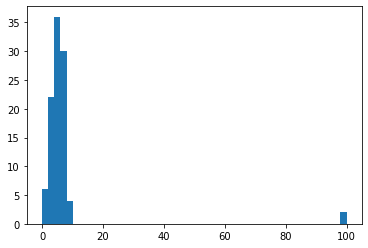

In [111]:
plt.hist(x, bins=np.arange(0,102,2)) # 0부터 102를 2 간격으로 보기

3.552713678800501e-17
1.0


(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.42637286,  0.31012103,  1.04661492,  1.7831088 ,  2.51960269,
         3.25609657,  3.99259046,  4.72908435,  5.46557823,  6.20207212,
         6.938566  ]),
 <a list of 10 Patch objects>)

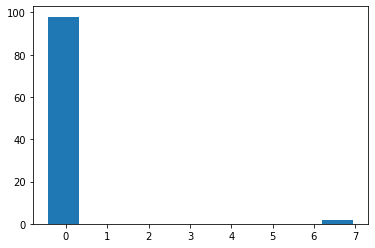

In [112]:
# StandardScaler().fit_transform()에 2차원이 들어가야해서 => reshape

x = x.reshape(100,1) # (100,) ->(100,1) 총 데이터 개수를 알아야함 
                    # x.reshape(-1,1) -1을 적어주면 알아서 구해줌 reshape(-1,5)하면 알아서 4가됨 (100/5)
ss_x = StandardScaler().fit_transform(x)
print(np.mean(ss_x))
print(np.std(ss_x))
plt.hist(ss_x)

(array([ 0.,  0.,  0.,  0.,  0.,  4.,  8., 23., 21., 26., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

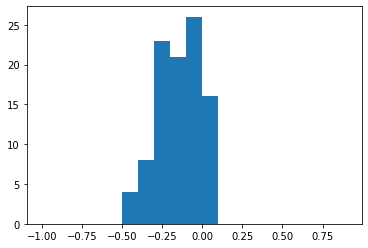

In [113]:
ss__x_z = ss_x[ss_x<5] # 그래프 보고 outlier 제거
plt.hist(ss__x_z,bins = np.arange(-1,1,0.1))

### 중앙값(median), IQR을 이용하여 스케일링
RobustScaler()

In [116]:
# 이상치 포함 데이터의 중앙값, IQR을 이용 -> 표준화
np.median(x)
q1 = np.percentile(x,25) # 1사분위수 작은 값부터 큰값까지 정렬했을때 25번째 숫자
q3 = np.percentile(x,75) # 3사분위수
iqr = q3-q1

-1.5916087892087205e-16
0.6307822811288076
4.801334449886842


(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-1.4163764 ,  2.11977707,  5.65593054,  9.192084  , 12.72823747,
        16.26439094, 19.8005444 , 23.33669787, 26.87285134, 30.4090048 ,
        33.94515827]),
 <a list of 10 Patch objects>)

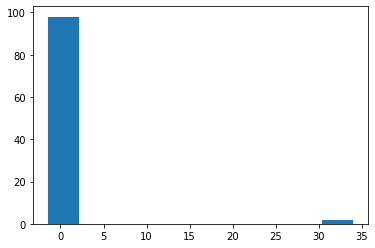

In [118]:
x_rs = RobustScaler().fit_transform(x)

print(np.median(x_rs))
print(np.mean(x_rs))
print(np.std(x_rs))
plt.hist(x_rs)

(array([1., 1., 4., 6., 2., 6., 7., 3., 3., 7., 5., 5., 5., 4., 4., 7., 5.,
        5., 3.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

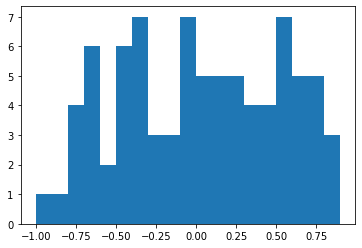

In [119]:
# outlier 제거
x_rs_z = x_rs[x_rs<10]
plt.hist(x_rs_z,bins = np.arange(-1,1,0.1))